# Paper Replicating

## Setup

### Import Libraries from Going modular

In [1]:
import sys
sys.path.append('../')
from going_modular import data_setup, engine
from helper_function import download_data, set_seeds, plot_loss_curves

/home/bestlabmct/miniconda3/envs/py38belajarpt/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Import Libraries

In [2]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
from torchinfo import summary

### Device Agnostic

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Tersedia GPU")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Tersedia MPS Apple Silicon")
else:
    device = torch.device("cpu")
    print("Tersedia CPU")

Tersedia GPU


## Get Data

Download Pizza Steak Sushi Dataset

In [4]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
train_dir = image_path / "train"
test_dir = image_path / "test"

print(f"Image path: {image_path}\nTrain path: {train_dir}\nTest path: {test_dir}\n")

[INFO] data/pizza_steak_sushi directory exists, skipping download.
Image path: data/pizza_steak_sushi
Train path: data/pizza_steak_sushi/train
Test path: data/pizza_steak_sushi/test



### Create DataLoaders

#### Membuat Fungsi Transforms

In [5]:
IMG_SIZE = 224
BATCH_SIZE = 32

manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

#### Memuat DataLoaders

In [6]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=BATCH_SIZE,
)

In [7]:
print(f"Length of train_dataloader: {len(train_dataloader)}\nLength of test_dataloader: {len(test_dataloader)}\n")
print(f"Class names: {class_names}\n")

Length of train_dataloader: 8
Length of test_dataloader: 3

Class names: ['pizza', 'steak', 'sushi']



#### Mencoba DataLoader

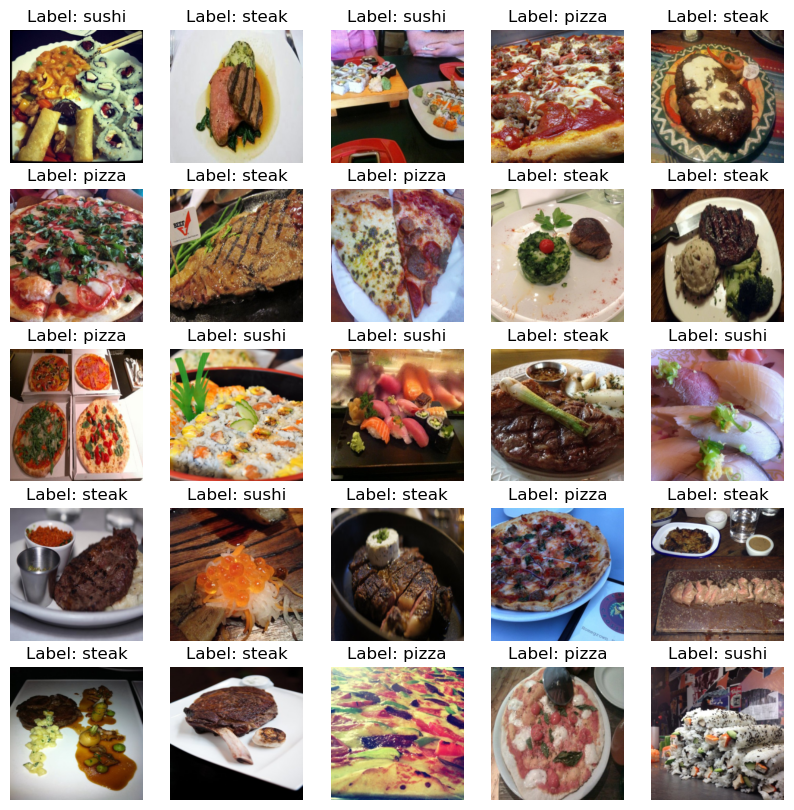

In [8]:
image_batch, label_batch = next(iter(train_dataloader))

def plot_images(images, labels, class_names):
    fig, ax = plt.subplots(figsize=(10, 10))
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].permute(1, 2, 0))
        plt.title(f"Label: {class_names[labels[i]]}")
        plt.axis("off")

plot_images(images=image_batch, labels=label_batch, class_names=class_names)